In [214]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline

## 2D data

ObsPy is really meant for earthquake data, so tends to 'think' in terms of timeseries, as opposed to volumes or 2D lines. It's worth bearing this in mind.

The `headonly=True` option tells ObsPy only to read the header information, but not the traces. This is much faster than reading traces if the file is large. When you access the trace data, ObsPy will go and fetch them from the file.

In [215]:
from obspy.io.segy.segy import _read_segy

stream = _read_segy('data.sgy', headonly=True)

In [216]:
stream

14520 traces in the SEG Y structure.

When we load a 2D line, the stream looks like a list of ObsPy `Trace` objects (even though we didn't actually load the data yet, because of `headonly=True`). We can treat it like any other sequence. For example:

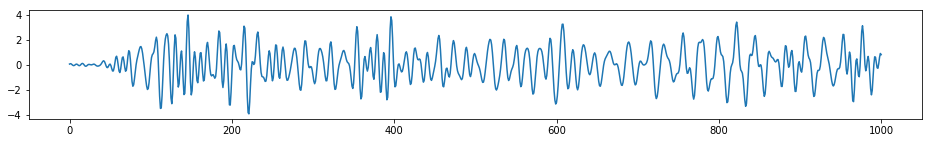

In [217]:
one_trace = stream.traces[0]

plt.figure(figsize=(16,2))
plt.plot(one_trace.data)
plt.show()

We'll get the data from every trace and put it into a NumPy array for ease of manipulation.

The [generator expression](https://docs.python.org/3/reference/expressions.html#generator-expressions) steps over every trace in `stream.traces` and gets its `data`, and then sends the data to `np.stack` which stacks them into an array. 

In [218]:
data = np.stack(t.data for t in stream.traces[0:120]) #There are 121 traces in each line of data

In [219]:
data.shape  # traces, time samples

(120, 1001)

Now we can have a look at what we got using `matplotlib.pyplot.imshow`, a handy way to treat a 2D array as an image. First let's get the 99th percentile of the amplitudes, to help scale the visualization (if we don't we often get what looks like a blank section).

In [220]:
vm = np.percentile(data, 99)
print("The 99th percentile is {:.0f}; the max amplitude is {:.0f}".format(vm, data.max()))

The 99th percentile is 3; the max amplitude is 6


Now we can make the plot. Notice that we have to transpose the array to plot it like this. The reason is that we're storing things with traces in the first dimension ('rows' if you like), for convenience. This way `data[0]` refers to the first trace, not the first time sample. But `imshow` assumes that we're looking at a sort of image, with rows going across the image. 

I'll include this in the *x* lines, because I think it's an important QC step at this point.

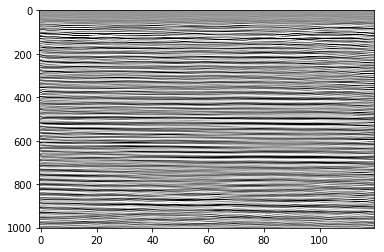

In [221]:
plt.imshow(data.T, cmap="Greys", vmin=-vm, vmax=vm, aspect='auto')

Only 4 lines of Python and we already have a display!

We can make an even nicer plot quite easily.

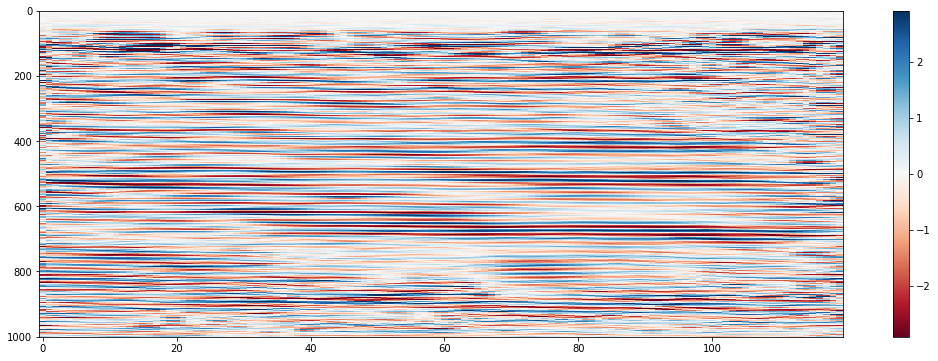

In [222]:
plt.figure(figsize=(18,6))
plt.imshow(data.T, cmap="RdBu", vmin=-vm, vmax=vm, aspect='auto')
plt.colorbar()
plt.show()

# Bandpass Filter

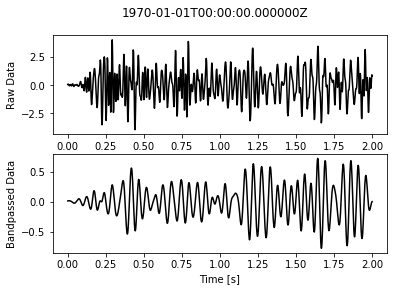

In [223]:
from obspy.io.segy.core import _read_segy

st = _read_segy('data.sgy', headonly=False)

# Read the seismogram
#st = obspy.read("data.sgy")

# Read one trace
tr = st[0]
#tr = data.T[0]

# Filtering with a Bandpass on a copy of the original Trace
tr_filt = tr.copy()
tr_filt.filter('bandpass', freqmin=10.0, freqmax=20.0, corners=2, zerophase=True)

# Now let's plot the raw and filtered data...
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
plt.subplot(211)
plt.plot(t, tr.data, 'k')
plt.ylabel('Raw Data')
plt.subplot(212)
plt.plot(t, tr_filt.data, 'k')
plt.ylabel('Bandpassed Data')
plt.xlabel('Time [s]')
plt.suptitle(tr.stats.starttime)
plt.show()

# Ridging

In [224]:
    SSD_Matrix=[]
#    SSD_Matrix.append(0)
#for n in st:
#    k=0
    for m in range(1, len(st[0])):
        print('m:    ',m)
        Val1=st[0][m-1]
        print('Val1: ', Val1)
        Val2=st[0][m]
        print('Val2: ', Val2)
        if m+2>1000: 
            SSD_Matrix.append(0)
        else:    
            Val3=st[0][m+1]
        print('Val3: ', Val3)
        if Val2>=0:
            if (Val2>=Val1)and(Val2>Val3): 
                SSD_Matrix.append(Val2)
            elif (Val2<Val1)and(Val2<Val3):
                SSD_Matrix.append(Val2)
            elif (Val2==Val3): 
                SSD_Matrix.append(0)
            else:
                SSD_Matrix.append(0)
        elif Val2<0: 
                if (Val2<=Val1)and(Val2<Val3):
                    SSD_Matrix.append(Val2)
                elif (Val2>Val1)and(Val2>Val3):
                    SSD_Matrix.append(Val2)
                elif (Val2==Val3): 
                    SSD_Matrix.append(0)
                else:
                    SSD_Matrix.append(0)
        #if SSD_Matrix[k]!=0:
        print('SSD: ', SSD_Matrix[m-1])
        print('---------------')
#        k=k+1

m:     1
Val1:  0.057991
Val2:  0.0889757
Val3:  0.074267
SSD:  0.0889757
---------------
m:     2
Val1:  0.0889757
Val2:  0.074267
Val3:  0.0210986
SSD:  0
---------------
m:     3
Val1:  0.074267
Val2:  0.0210986
Val3:  -0.0381583
SSD:  0
---------------
m:     4
Val1:  0.0210986
Val2:  -0.0381583
Val3:  -0.0663098
SSD:  0
---------------
m:     5
Val1:  -0.0381583
Val2:  -0.0663098
Val3:  -0.0468991
SSD:  -0.0663098
---------------
m:     6
Val1:  -0.0663098
Val2:  -0.0468991
Val3:  0.00385803
SSD:  0
---------------
m:     7
Val1:  -0.0468991
Val2:  0.00385803
Val3:  0.0478636
SSD:  0
---------------
m:     8
Val1:  0.00385803
Val2:  0.0478636
Val3:  0.0517819
SSD:  0
---------------
m:     9
Val1:  0.0478636
Val2:  0.0517819
Val3:  0.0113932
SSD:  0.0517819
---------------
m:     10
Val1:  0.0517819
Val2:  0.0113932
Val3:  -0.0439453
SSD:  0
---------------
m:     11
Val1:  0.0113932
Val2:  -0.0439453
Val3:  -0.0716146
SSD:  0
---------------
m:     12
Val1:  -0.0439453
Val2:  -0.

m:     210
Val1:  -0.072892
Val2:  -0.359904
Val3:  -0.408699
SSD:  0
---------------
m:     211
Val1:  -0.359904
Val2:  -0.408699
Val3:  0.0598242
SSD:  -0.408699
---------------
m:     212
Val1:  -0.408699
Val2:  0.0598242
Val3:  1.07408
SSD:  0
---------------
m:     213
Val1:  0.0598242
Val2:  1.07408
Val3:  2.28794
SSD:  0
---------------
m:     214
Val1:  1.07408
Val2:  2.28794
Val3:  3.09371
SSD:  0
---------------
m:     215
Val1:  2.28794
Val2:  3.09371
Val3:  2.93378
SSD:  3.09371
---------------
m:     216
Val1:  3.09371
Val2:  2.93378
Val3:  1.63539
SSD:  0
---------------
m:     217
Val1:  2.93378
Val2:  1.63539
Val3:  -0.436872
SSD:  0
---------------
m:     218
Val1:  1.63539
Val2:  -0.436872
Val3:  -2.52065
SSD:  0
---------------
m:     219
Val1:  -0.436872
Val2:  -2.52065
Val3:  -3.82575
SSD:  0
---------------
m:     220
Val1:  -2.52065
Val2:  -3.82575
Val3:  -3.92825
SSD:  0
---------------
m:     221
Val1:  -3.82575
Val2:  -3.92825
Val3:  -2.96783
SSD:  -3.92825
--

m:     500
Val1:  0.903689
Val2:  0.776651
Val3:  0.521601
SSD:  0
---------------
m:     501
Val1:  0.776651
Val2:  0.521601
Val3:  0.262526
SSD:  0
---------------
m:     502
Val1:  0.521601
Val2:  0.262526
Val3:  0.0650803
SSD:  0
---------------
m:     503
Val1:  0.262526
Val2:  0.0650803
Val3:  -0.0882754
SSD:  0
---------------
m:     504
Val1:  0.0650803
Val2:  -0.0882754
Val3:  -0.266743
SSD:  0
---------------
m:     505
Val1:  -0.0882754
Val2:  -0.266743
Val3:  -0.528502
SSD:  0
---------------
m:     506
Val1:  -0.266743
Val2:  -0.528502
Val3:  -0.867226
SSD:  0
---------------
m:     507
Val1:  -0.528502
Val2:  -0.867226
Val3:  -1.20116
SSD:  0
---------------
m:     508
Val1:  -0.867226
Val2:  -1.20116
Val3:  -1.40886
SSD:  0
---------------
m:     509
Val1:  -1.20116
Val2:  -1.40886
Val3:  -1.38988
SSD:  -1.40886
---------------
m:     510
Val1:  -1.40886
Val2:  -1.38988
Val3:  -1.11365
SSD:  0
---------------
m:     511
Val1:  -1.38988
Val2:  -1.11365
Val3:  -0.630196
SS

Val2:  1.36833
Val3:  1.7417
SSD:  0
---------------
m:     775
Val1:  1.36833
Val2:  1.7417
Val3:  1.81023
SSD:  0
---------------
m:     776
Val1:  1.7417
Val2:  1.81023
Val3:  1.77466
SSD:  1.81023
---------------
m:     777
Val1:  1.81023
Val2:  1.77466
Val3:  1.8031
SSD:  1.77466
---------------
m:     778
Val1:  1.77466
Val2:  1.8031
Val3:  1.927
SSD:  0
---------------
m:     779
Val1:  1.8031
Val2:  1.927
Val3:  2.02464
SSD:  0
---------------
m:     780
Val1:  1.927
Val2:  2.02464
Val3:  1.89915
SSD:  2.02464
---------------
m:     781
Val1:  2.02464
Val2:  1.89915
Val3:  1.40515
SSD:  0
---------------
m:     782
Val1:  1.89915
Val2:  1.40515
Val3:  0.551457
SSD:  0
---------------
m:     783
Val1:  1.40515
Val2:  0.551457
Val3:  -0.478645
SSD:  0
---------------
m:     784
Val1:  0.551457
Val2:  -0.478645
Val3:  -1.40414
SSD:  0
---------------
m:     785
Val1:  -0.478645
Val2:  -1.40414
Val3:  -1.978
SSD:  0
---------------
m:     786
Val1:  -1.40414
Val2:  -1.978
Val3:  -2

##### Read the file headers

We can try to read the text header, using `decode` to turn it from bytes into a regular Python string, but it contains no line breaks. 

In [225]:
# If you get nonsense here, the header is probably EBCDIC encoded.
# In that case pass ``encoding='cp037'`` to ``decode``.
print(stream.textual_file_header.decode())

C 1 CLIENT-RCP          COMPANY-COLORADO SCHOOL OF MINES                        C 2 DATE: 6-8-10                                                                C 3 POSTLE-3D,  TEXAS COUNTY, OKLAHOMA                                          C 4 1ST SURVEY                                                                  C 5 POST STACK MIGRATION WITH/SRFDEC, WITH DIFFERENTATION                       C 6                                                                             C 7 500 MSEC TVS SCALOR APPLIED, FXY DECONVOLUTION APPLIED                      C 8 BANDPASS FILTER 10-70HZ                                                     C 9 POLARITY UNCHANGED                                                          C10 DATUM 3400 FT   REPL VELOCITY  10,000 FT/SEC                                C11                                                                             C12  3D GRID  110.0 FT X 110.0 FT                                               C13  ILINE XLINE    CDPX       CDPY     

Usually it's meant to be read with linebreaks, so let's use a bit of a hack to 'reshape' it into 40 lines of 80 characters:

In [226]:
x = np.array(list(stream.textual_file_header.decode()))
print('\n'.join(''.join(row) for row in x.reshape((40, 80))))

C 1 CLIENT-RCP          COMPANY-COLORADO SCHOOL OF MINES                        
C 2 DATE: 6-8-10                                                                
C 3 POSTLE-3D,  TEXAS COUNTY, OKLAHOMA                                          
C 4 1ST SURVEY                                                                  
C 5 POST STACK MIGRATION WITH/SRFDEC, WITH DIFFERENTATION                       
C 6                                                                             
C 7 500 MSEC TVS SCALOR APPLIED, FXY DECONVOLUTION APPLIED                      
C 8 BANDPASS FILTER 10-70HZ                                                     
C 9 POLARITY UNCHANGED                                                          
C10 DATUM 3400 FT   REPL VELOCITY  10,000 FT/SEC                                
C11                                                                             
C12  3D GRID  110.0 FT X 110.0 FT                                               
C13  ILINE XLINE    CDPX    

Weirdly, the binary file header is easier to read:

In [227]:
print(stream.binary_file_header)

Binary File Header:
	job_identification_number: 9999
	line_number: 9999
	reel_number: 1
	number_of_data_traces_per_ensemble: 121
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 2000
	sample_interval_in_microseconds_of_original_field_recording: -32768
	number_of_samples_per_data_trace: 1001
	number_of_samples_per_data_trace_for_original_field_recording: -13922
	data_sample_format_code: 1
	ensemble_fold: 499
	trace_sorting_code: 4
	vertical_sum_code: 1
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 2
	binary_gain_recovered: 1
	amplitude_recovery_method: 4
	measurement_system: 2
	impulse_signal_polarity: 1
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

## Look at traces

Since we're looking at headers, let's look at the header of the first trace:

In [228]:
print(stream.traces[0].header)

trace_sequence_number_within_line: 0
trace_sequence_number_within_segy_file: 1
original_field_record_number: 2
trace_number_within_the_original_field_record: 1
energy_source_point_number: 861
ensemble_number: 122
trace_number_within_the_ensemble: 1
trace_identification_code: 1
number_of_vertically_summed_traces_yielding_this_trace: 0
number_of_horizontally_stacked_traces_yielding_this_trace: 2
data_use: 0
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: 0
receiver_group_elevation: 33500000
surface_elevation_at_source: 33560000
source_depth_below_surface: 0
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: -10000
scalar_to_be_applied_to_all_coordinates: -1000
source_coordinate_x: 925104062
source_coordinate_y: 706519125
group_coordinate_x: 0
group_coordinate_y: 0
coordinate_units: 1
weathering_velocity: 0
subweathering_velocity: 0
uphole_time_a

Check what various fields look like:

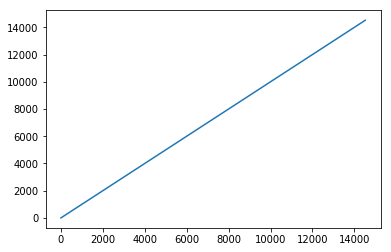

In [229]:
plt.plot([t.header.trace_sequence_number_within_segy_file for t in stream.traces])
plt.show()

## Write data

In [230]:
from obspy.core import AttribDict
from obspy.core import Stats

from obspy.core import Trace, Stream
from obspy.io.segy.segy import SEGYBinaryFileHeader
from obspy.io.segy.segy import SEGYTraceHeader

Let's make a change to the trace data, and save it as a new SEG-Y file.

In [231]:
import bruges

In [232]:
dt = stream.traces[0].header.sample_interval_in_ms_for_this_trace / 1e6
similarity = bruges.attribute.similarity(data, duration=0.16, dt=dt)

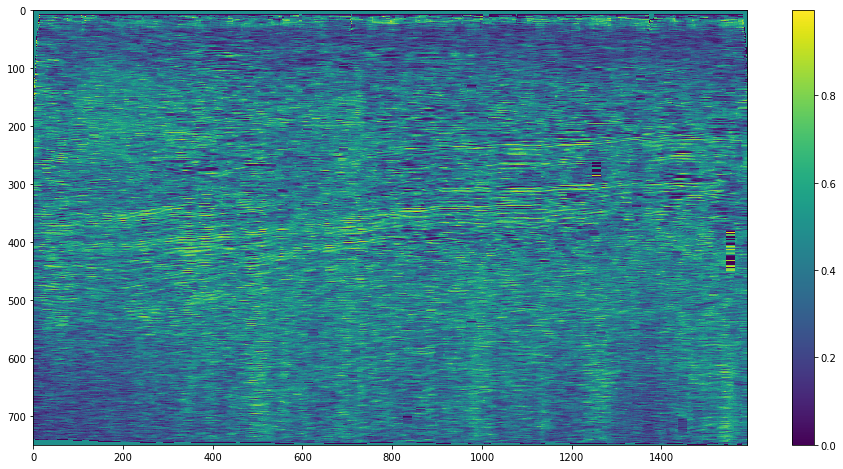

In [22]:
plt.figure(figsize=(16,8))
plt.imshow(similarity.T, cmap="viridis", aspect='auto')
plt.colorbar()
plt.show()

Now we have something worth writing (OK, maybe not, this section is pretty boring, but whatever, you get the idea). We make a new `Stream` object from a sequence of `Trace` objects, putting their sample intervals in the headers &mdash; a requirement of ObsPy.

This might seem really terse, but I'm on a budget :) It's basically the same as this long-hand, annotated Python, using `t` for 'a trace-like 1D array from my NumPy array' and `trace` for 'an ObsPy `Trace` object:

    out = Stream()                      # Make a new Stream object, basically an empty list-like thing.
    for t in similarity:                # Loop over all trace-like things in the similarity array.
        header = {'delta': dt}          # Make a header for the trace; ObsPy needs this.
        trace = Trace(t, header=header) # Make the ObsPy Trace with the data and the header.
        out.append(trace)               # Append the Trace to the Stream.
        
This short-hand form is called a generator expression, one of the most useful bits of Python there is. It does exactly the same thing.

In [23]:
out = Stream(Trace(t, header=dict(delta=dt)) for t in similarity)

We should add some info to the header, which can contain up to 40 lines of 80 characters. We'll start by recycling the first ten lines of the existing header:

In [24]:
out.stats = Stats(dict(textual_file_header=stream.textual_file_header[:800]))

Now we can add to it:

In [25]:
out.stats.textual_file_header += """Similarity volume.
Generated: 18 Sep 2016 by Matt Hall matt@agilegeoscience.com.
Algorithm: github.com/agile-geoscience/bruges.attribute.similarity.
Parameters: duration=0.16 s, dt=0.008 s.""".encode('utf-8')

And then write the file (there's a warning about ObsPy having to create the trace headers. We could have done this, but I'm on a budget!)

In [26]:
out.write('out.sgy', format='SEGY', data_encoding=5)  # encode 1 for IBM, 5 for IEEE

C:\Users\mohse\Anaconda3\lib\site-packages\obspy\io\segy\core.py:357: UserWarning: CREATING TRACE HEADER
  warnings.warn("CREATING TRACE HEADER")


## Validate what we did

I figured you might not believe that this did what we wanted... so let's check the header of the file we just created.

In [27]:
s = _read_segy('out.sgy', headonly=True)

In [28]:
s.textual_file_header[:15*80]  # First 15 lines.

b'C   CLIENT/JOB ID    0 5 5 5 2 9 3 4 7 2                                        C   LINE  L3X                                                                   C   REEL NO 751023083601   DAY-START OF REEL  23       YEAR 1975                C   INSTRUMENT: MFG TI          MODEL ASC                                       C   DATA TRACES/RECORD0001      AUXILIARY TRACES/RECORD 0       CDP FOLD  0001  C SAMPLE INTERNAL 0000008000 US  SAMPLES/TRACE  0751BITS/IN 1600 BYTES/SAMPLE 4 C   RECORDING FORMAT  STDI              FORMAT THIS REEL SEG Y1                 C   SAMPLE CODE: FLOATING PT                                                    C   GAIN TYPE:   FLOATING PT                                                    C                                                                               Similarity volume.\nGenerated: 18 Sep 2016 by Matt Hall matt@agilegeoscience.com.\nAlgorithm: github.com/agile-geoscience/bruges.attribute.similarity.\nParameters: duration=0.16 s, dt=0.008 s.      

And the actual trace data:

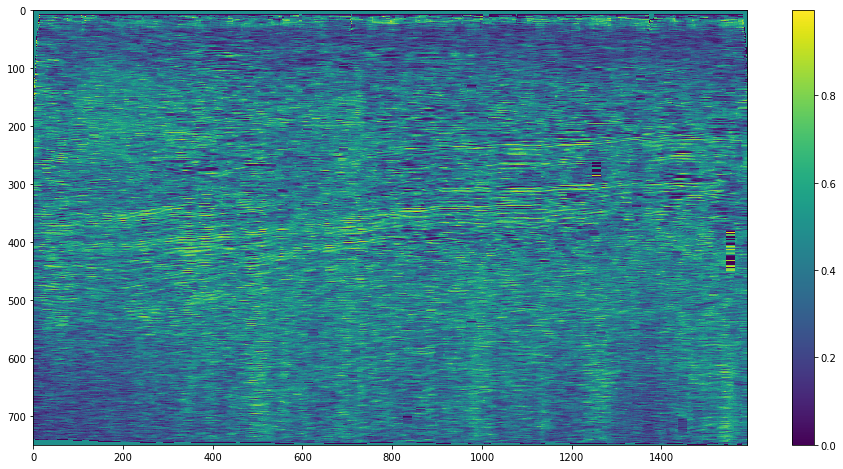

In [29]:
plt.figure(figsize=(16,8))
plt.imshow(np.vstack(t.data for t in s.traces).T,
           cmap='viridis',
           aspect='auto')
plt.colorbar()
plt.show()

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>